### 문장 단위 쪼개기



In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

daraz = pd.read_csv("C:\\Users\\rud92\\Machine_learning_Project\\Daraz Online Shopping App.csv")


### 문장 단위로 분해 & 새로운 DF 만들기 
new_rows = []
for idx, row in daraz.iterrows():
    original_row_number = idx

    content_text = row['content']
    score = row['score']
    
    sentences = sent_tokenize(content_text)
    

    for sent in sentences:
        new_rows.append({
            'original_row_number': original_row_number,  
            'sentence': sent.strip(), 
            'score': score
        })

df_sentences = pd.DataFrame(new_rows)



##전처리 +피처벡터화 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


##content 전처리

# 불용어 리스트
custom_stopwords = set(stopwords.words('english')).union({"want", "on", "buy", "give", "every", "single", "pop", "one", "look", "is", "the", "and", "it", "very", "to", "this", "for", "of", "in", "on", "have", "app"})

# 어간, 표제어 추출기  --> 어근이 제대로 안 나와서 PorterStemmer라는 걸 추가로 활용했어요!
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    if not isinstance(text, str):  # NaN 방지
        return ""

    # 클렌징
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 

    # 토큰화
    tokens = word_tokenize(text)

    # 불용어 제거
    tokens = [word for word in tokens if word not in custom_stopwords]

    # 어근 추출 및 표제어 추출(pos 태그 verb로 설정)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens]

    #중복 단어 제거
    tokens = list(dict.fromkeys(tokens))

    return ' '.join(tokens)


df_sentences['preprocessed_sentence'] = df_sentences['sentence'].apply(preprocess_text)


# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_sentences['preprocessed_sentence'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df_sentences.head(6)

##문장 단위로 잘 나뉨

,original_row_number,sentence,score,preprocessed_sentence,sentiment_score
0,0,"App is now bombarded with ads, making it feel ...",3,bombard ad make feel cheap fraudulent website,-0.4939
1,0,The website really has lost its class.,3,website really lose class,-0.4576
2,0,They charge you for doing cash on delivery.,3,charge cash delivery,0.0000
3,0,"Ads pop up after every single tap, which is fr...",3,ad tap frustrate want bombard useless,-0.6705
4,0,But I have to give props to their customer ser...,3,prop customer service delivery whole,0.0000
5,1,The search is by far the most atrocious aspect...,1,search far atrocious aspect daraz general webs...,-0.3412


#### 전처리 + 피처벡터화 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rud92\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_sentences['preprocessed_sentence'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# 2. 성능 비교

# 2.1. 자주 등장하는 단어 출력 함수
def top_words(vectorizer, X, top_n=30):
    words = vectorizer.get_feature_names_out() # 벡터화된 데이터에서 고유한 단어들을 반환하는 함수
    word_freq = X.sum(axis=0).A1  # .sum(axis=0)은 각 단어의 등장횟수 계산
                                   # .A1은 희소->밀집 행렬 변환 메서드
    wofr_pair = list(zip(words, word_freq)) # 단어-등장횟수 페어 만들기
    wofr_pair = sorted(wofr_pair, key=lambda x: x[1], reverse=True)[:top_n] # 내림차순 정렬 후 상위 n개 추출
    return wofr_pair
 

# 2.3. TF-IDF 상위 단어 추출
tfidf_top_words = top_words(tfidf_vect, X_train_tfidf)
print("TF-IDF에서 자주 등장하는 상위 30개 단어:")
for word, count in tfidf_top_words:
    print(f"{word}: {count}")

TF-IDF에서 자주 등장하는 상위 30개 단어:
good: 3646.73262264974
daraz: 2882.2443368528498
shop: 2804.7459151367834
product: 2443.1483360825937
online: 2124.2485117870183
order: 1805.1255101752563
delivery: 1779.1074041752424
best: 1655.8064504746405
service: 1545.543451276159
time: 1419.4992636207428
experience: 1252.7553331044471
bad: 1221.9878054258993
use: 1148.4323048087492
thing: 1113.3170427419182
thank: 1073.1584097136738
quality: 990.4828557463871
get: 978.7683767215239
like: 962.2744003784942
love: 961.9346580184036
nice: 942.7257962946217
item: 940.523538288034
easy: 940.2207728737648
dont: 930.7655034755039
great: 886.395701070555
much: 814.4872834732562
worst: 804.5603530102925
customer: 779.0814402626331
charge: 764.7331467887275
show: 756.7227343185821
work: 755.1892145267415


#### 오버샘플링

오버 샘플링의 경우 별점 내용 때문에 도입한 내용이었는데, 문장 단위 분류 후 감성 분석 점수를 확인하는 과정에서는 별점 정보를 꼭 사용해야 할까...? 
별점 정보는 감성 점수랑 비교해서 보는 과정이 있으면 좋을 것 같아서 넣었음.
그러나 딱히 오버 샘플링이 필요하지 않아 생략했음

#### 감성 분석 

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

## nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df_sentences['sentiment_score'] = df_sentences['preprocessed_sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(df_sentences[['preprocessed_sentence', 'sentiment_score']])

                               preprocessed_sentence  sentiment_score
0      bombard ad make feel cheap fraudulent website          -0.4939
1                          website really lose class          -0.4576
2                               charge cash delivery           0.0000
3              ad tap frustrate want bombard useless          -0.6705
4               prop customer service delivery whole           0.0000
...                                              ...              ...
96689                                       easy use           0.4404
96690                                           love           0.6369
96691     helpful thankyou thankful team daraz happy           0.8807
96692                            easy wasy shop home           0.4404
96693                                   amaze unique           0.5423

[96694 rows x 2 columns]


In [13]:
df_sentences

,original_row_number,sentence,score,preprocessed_sentence,sentiment_score
0,0,"App is now bombarded with ads, making it feel ...",3,bombard ad make feel cheap fraudulent website,-0.4939
1,0,The website really has lost its class.,3,website really lose class,-0.4576
2,0,They charge you for doing cash on delivery.,3,charge cash delivery,0.0000
3,0,"Ads pop up after every single tap, which is fr...",3,ad tap frustrate want bombard useless,-0.6705
4,0,But I have to give props to their customer ser...,3,prop customer service delivery whole,0.0000
...,...,...,...,...,...
96689,53996,Very easy to use.,5,easy use,0.4404
96690,53996,I love this app.,5,love,0.6369
96691,53997,This is very helpful thankyou very very thankf...,5,helpful thankyou thankful team daraz happy,0.8807
96692,53998,Easy wasy to shop at home,4,easy wasy shop home,0.4404


   original_row_number  avg_sentiment_score  score
0                    0            -0.324400      3
1                    1            -0.132225      1
2                    2             0.032800      1
3                    3            -0.154888      3
4                    4            -0.146529      1


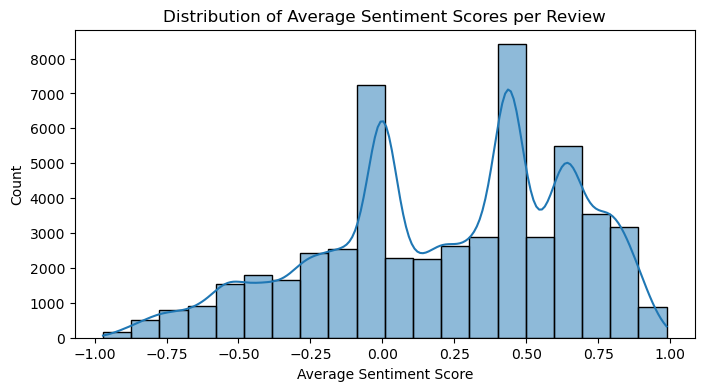

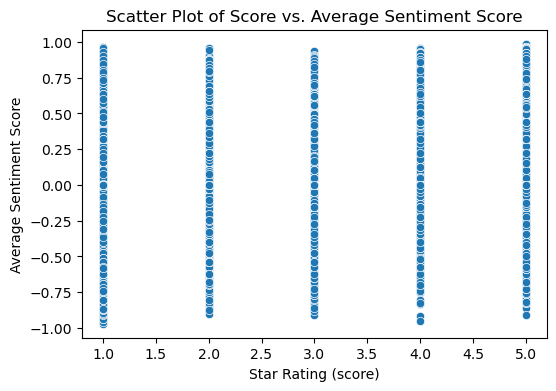

Correlation between star rating and average sentiment score: 0.6743


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_review_sentiment = (
    df_sentences
    .groupby('original_row_number')['sentiment_score']
    .mean()
    .to_frame('avg_sentiment_score')  
)

df_review_sentiment = df_review_sentiment.join(daraz['score'])

df_review_sentiment.reset_index(inplace=True)

print(df_review_sentiment.head())


# 리뷰별 평균 감성 점수와 별점
plt.figure(figsize=(8,4))
sns.histplot(df_review_sentiment['avg_sentiment_score'], kde=True, bins=20)
plt.title('Distribution of Average Sentiment Scores per Review')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Count')
plt.show()

# 별점, 평균 감성 점수 간의 관계
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_review_sentiment, x='score', y='avg_sentiment_score')
plt.title('Scatter Plot of Score vs. Average Sentiment Score')
plt.xlabel('Star Rating (score)')
plt.ylabel('Average Sentiment Score')
plt.show()

# 상관계수
corr_value = df_review_sentiment['score'].corr(df_review_sentiment['avg_sentiment_score'])
print(f"Correlation between star rating and average sentiment score: {corr_value:.4f}")

### 5차 회의 자료 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


## nltk.download('punkt_tab')

daraz2 = pd.read_csv(r"C:\Users\rud92\Machine_learning_Project\Daraz Online Shopping App.csv")

## 칼럼 정리
daraz2 = daraz.drop(columns=['reviewId', 'replyContent', 'repliedAt', 'at'])

def assign_category(x):
    if x == 0:
        return 0
    elif 1 <= x <= 5:
        return 1
    elif 5 < x <= 10:
        return 2
    elif 11 <= x <= 50:
        return 3
    elif 51 <= x <= 100:
        return 4
    else:
        return 5

daraz2['category'] = daraz2['thumbsUpCount'].apply(assign_category)

##content 전처리

# 불용어 리스트
custom_stopwords = set(stopwords.words('english')).union({"want", "on", "buy", "give", "every", "single", "pop", "one", "look"})

# 어간, 표제어 추출기  --> 어근이 제대로 안 나와서 PorterStemmer라는 걸 추가로 활용했어요!
lemmatizer2 = WordNetLemmatizer()
stemmer2 = PorterStemmer()

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    if not isinstance(text, str):  # NaN 방지
        return ""

    # 클렌징
    text = text.lower() 
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 

    # 토큰화
    tokens2 = word_tokenize(text)

    # 불용어 제거
    tokens2 = [word for word in tokens2 if word not in custom_stopwords]

    # 어근 추출 및 표제어 추출(pos 태그 verb로 설정)
    tokens2 = [lemmatizer2.lemmatize(word) for word in tokens2]
    tokens2 = [lemmatizer2.lemmatize(word, pos="v") for word in tokens2]

    #중복 단어 제거
    tokens2 = list(dict.fromkeys(tokens2))

    return ' '.join(tokens2)

daraz2['content'] = daraz2['content'].apply(preprocess_text)



# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train2, X_test2 = train_test_split(daraz2['content'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train2)
X_train_tfidf = tfidf_vect.transform(X_train2)
X_test_tfidf = tfidf_vect.transform(X_test2)

In [21]:
daraz2.head

<bound method NDFrame.head of                                                  content  score  \
0      app bombard ad make feel cheap fraudulent webs...      3   
1      search far atrocious aspect app daraz general ...      1   
2      recently experience service would like provide...      1   
3      much ad notification option disable device sys...      3   
4      update redesign even uglier front end still bu...      1   
...                                                  ...    ...   
53995  wow great ecommerce site bangladesh thank much...      5   
53996                                  easy use love app      5   
53997         helpful thankyou thankful team daraz happy      5   
53998                                easy wasy shop home      4   
53999                                   amaze unique app      5   

       thumbsUpCount                    appName  category  
0                 37  Daraz Online Shopping App         3  
1                142  Daraz Online Shopping A

In [23]:
# 피처벡터화

# 데이터 나누기
from sklearn.model_selection import train_test_split
X_train2, X_test2 = train_test_split(daraz2['content'], test_size=0.2, random_state=42)


# 1.2. TF-IDF 기반의 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3, max_features=5000)
tfidf_vect.fit(X_train2)
X_train_tfidf = tfidf_vect.transform(X_train2)
X_test_tfidf = tfidf_vect.transform(X_test2)

In [25]:
#부정적 리뷰(평점 1~2) 필터링
negative_reviews = daraz2[daraz2['score'] <= 2]['content'].dropna()

# 토픽 모델링 (LDA 적용)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = count_vectorizer.fit_transform(negative_reviews)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# 토픽별 주요 키워드 출력
print("\n토픽 모델링 결과:")
words = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"\n📌 Topic {topic_idx + 1}:")
    print(", ".join([words[i] for i in topic.argsort()[:-11:-1]]))


토픽 모델링 결과:

📌 Topic 1:
service, daraz, customer, order, delivery, worst, day, online, time, shop

📌 Topic 2:
product, order, app, bad, quality, daraz, time, dont, fake, thing

📌 Topic 3:
app, product, good, update, slow, daraz, search, like, new, bad

📌 Topic 4:
app, work, order, problem, daraz, try, time, use, say, fix

📌 Topic 5:
delivery, charge, price, product, daraz, high, cash, pay, point, item


In [27]:
!pip install textblob

## 감정 분석 수행 및 감정 점수 포함
from textblob import TextBlob

# 감정 분석 점수 계산 (TextBlob 활용)
daraz2['sentiment_score'] = daraz2['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# 감정 분류 함수
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

daraz2['sentiment'] = daraz2['sentiment_score'].apply(categorize_sentiment)

# 감정 분석 결과 출력
print(daraz2[['content', 'sentiment_score', 'sentiment']].head())

                                             content  sentiment_score  \
0  app bombard ad make feel cheap fraudulent webs...         0.075000   
1  search far atrocious aspect app daraz general ...         0.040833   
2  recently experience service would like provide...        -0.333333   
3  much ad notification option disable device sys...        -0.100000   
4  update redesign even uglier front end still bu...         0.059375   

  sentiment  
0   Neutral  
1   Neutral  
2  Negative  
3   Neutral  
4   Neutral  


In [29]:
print(df_sentences)

       original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score               

In [31]:
print(df_review_sentiment)

       original_row_number  avg_sentiment_score  score
0                        0            -0.324400      3
1                        1            -0.132225      1
2                        2             0.032800      1
3                        3            -0.154888      3
4                        4            -0.146529      1
...                    ...                  ...    ...
53995                53995             0.443000      5
53996                53996             0.538650      5
53997                53997             0.880700      5
53998                53998             0.440400      4
53999                53999             0.542300      5

[54000 rows x 3 columns]


In [33]:
import pandas as pd
import numpy as np

def assign_sentiment_label(score):
    if score <= -0.1:
        return "Negative"
    elif score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

df_sentences['sentiment_label'] = df_sentences['sentiment_score'].apply(assign_sentiment_label)

In [35]:
print(df_sentences)

       original_row_number                                           sentence  \
0                        0  App is now bombarded with ads, making it feel ...   
1                        0             The website really has lost its class.   
2                        0        They charge you for doing cash on delivery.   
3                        0  Ads pop up after every single tap, which is fr...   
4                        0  But I have to give props to their customer ser...   
...                    ...                                                ...   
96689                53996                                  Very easy to use.   
96690                53996                                   I love this app.   
96691                53997  This is very helpful thankyou very very thankf...   
96692                53998                          Easy wasy to shop at home   
96693                53999                          Amazing and so unique app   

       score               

In [37]:
sentiment_counts = df_sentences.groupby('original_row_number')['sentiment_label'].value_counts().unstack(fill_value=0)
sentiment_counts['total_sentences'] = sentiment_counts.sum(axis=1)


sentiment_counts['negative_ratio'] = sentiment_counts['Negative'] / sentiment_counts['total_sentences']
sentiment_counts['neutral_ratio'] = sentiment_counts['Neutral'] / sentiment_counts['total_sentences']
sentiment_counts['positive_ratio'] = sentiment_counts['Positive'] / sentiment_counts['total_sentences']

print(sentiment_counts)

sentiment_label      Negative  Neutral  Positive  total_sentences  \
original_row_number                                                 
0                           3        2         0                5   
1                           3        0         1                4   
2                           1        1         1                3   
3                           2        6         0                8   
4                           3        2         2                7   
...                       ...      ...       ...              ...   
53995                       0        1         1                2   
53996                       0        0         2                2   
53997                       0        0         1                1   
53998                       0        0         1                1   
53999                       0        0         1                1   

sentiment_label      negative_ratio  neutral_ratio  positive_ratio  
original_row_number              

In [39]:
# sentiment_counts의 필요한 칼럼만 선택 (비율 칼럼)
sentiment_ratios = sentiment_counts[['negative_ratio', 'neutral_ratio', 'positive_ratio']].reset_index()

print(sentiment_ratios)

sentiment_label  original_row_number  negative_ratio  neutral_ratio  \
0                                  0        0.600000       0.400000   
1                                  1        0.750000       0.000000   
2                                  2        0.333333       0.333333   
3                                  3        0.250000       0.750000   
4                                  4        0.428571       0.285714   
...                              ...             ...            ...   
53995                          53995        0.000000       0.500000   
53996                          53996        0.000000       0.000000   
53997                          53997        0.000000       0.000000   
53998                          53998        0.000000       0.000000   
53999                          53999        0.000000       0.000000   

sentiment_label  positive_ratio  
0                      0.000000  
1                      0.250000  
2                      0.333333  
3          

In [41]:
# df_review_sentiment와 merge
df_review_sentiment = df_review_sentiment.merge(sentiment_ratios, on='original_row_number', how='left')

print(df_review_sentiment)

       original_row_number  avg_sentiment_score  score  negative_ratio  \
0                        0            -0.324400      3        0.600000   
1                        1            -0.132225      1        0.750000   
2                        2             0.032800      1        0.333333   
3                        3            -0.154888      3        0.250000   
4                        4            -0.146529      1        0.428571   
...                    ...                  ...    ...             ...   
53995                53995             0.443000      5        0.000000   
53996                53996             0.538650      5        0.000000   
53997                53997             0.880700      5        0.000000   
53998                53998             0.440400      4        0.000000   
53999                53999             0.542300      5        0.000000   

       neutral_ratio  positive_ratio  
0           0.400000        0.000000  
1           0.000000        0.250

In [43]:
def assign_review_sentiment(avg_score):
    if avg_score <= -0.1:
        return "Negative"
    elif avg_score >= 0.1:
        return "Positive"
    else:
        return "Neutral"

df_review_sentiment['sentiment_label'] = df_review_sentiment['avg_sentiment_score'].apply(assign_review_sentiment)

In [49]:
df_review_sentiment.head

<bound method NDFrame.head of        original_row_number  avg_sentiment_score  score  negative_ratio  \
0                        0            -0.324400      3        0.600000   
1                        1            -0.132225      1        0.750000   
2                        2             0.032800      1        0.333333   
3                        3            -0.154888      3        0.250000   
4                        4            -0.146529      1        0.428571   
...                    ...                  ...    ...             ...   
53995                53995             0.443000      5        0.000000   
53996                53996             0.538650      5        0.000000   
53997                53997             0.880700      5        0.000000   
53998                53998             0.440400      4        0.000000   
53999                53999             0.542300      5        0.000000   

       neutral_ratio  positive_ratio sentiment_label  
0           0.400000      

In [51]:
positive_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Positive']

print(positive_reviews.head())
print("긍정 리뷰 수:", len(positive_reviews))

    original_row_number  avg_sentiment_score  score  negative_ratio  \
8                     8             0.418125      5        0.250000   
12                   12             0.522180      5        0.000000   
16                   16             0.190633      1        0.000000   
18                   18             0.271400      3        0.200000   
19                   19             0.224617      4        0.333333   

    neutral_ratio  positive_ratio sentiment_label  
8        0.000000        0.750000        Positive  
12       0.200000        0.800000        Positive  
16       0.666667        0.333333        Positive  
18       0.400000        0.400000        Positive  
19       0.166667        0.500000        Positive  
긍정 리뷰 수: 32415


C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda

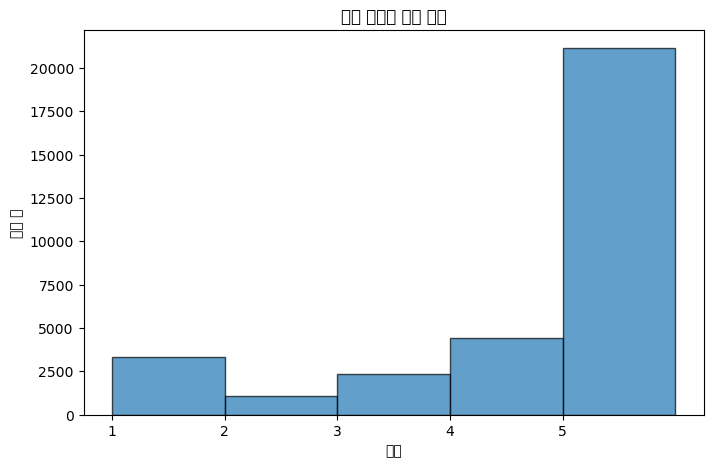

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(positive_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('긍정 리뷰의 별점 분포')
plt.xticks(range(1, 6))
plt.show()

In [55]:
negative_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Negative']
neutral_reviews = df_review_sentiment[df_review_sentiment['sentiment_label'] == 'Neutral']

print("부정 리뷰 수:", len(negative_reviews))
print("중립 리뷰 수:", len(neutral_reviews))

부정 리뷰 수: 12124
중립 리뷰 수: 9461


C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\L

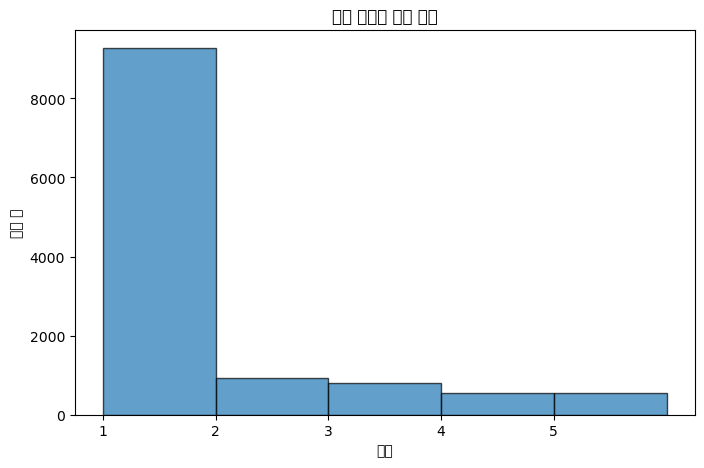

In [57]:
plt.figure(figsize=(8, 5))
plt.hist(negative_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('부정 리뷰의 별점 분포')
plt.xticks(range(1, 6))
plt.show()

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\L

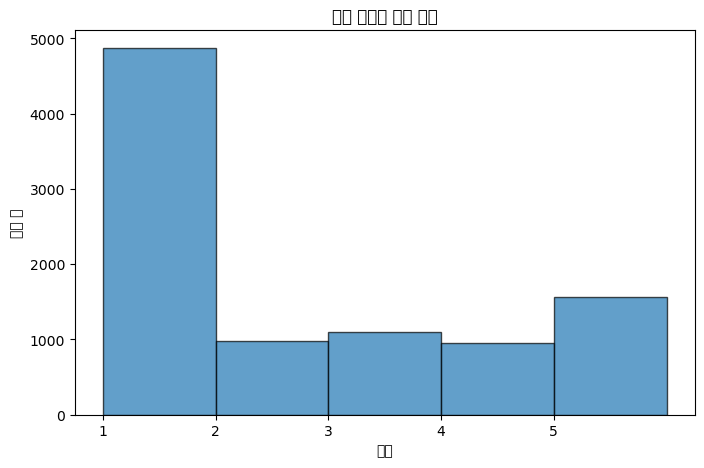

In [59]:
plt.figure(figsize=(8, 5))
plt.hist(neutral_reviews['score'], bins=range(1, 7), edgecolor='k', alpha=0.7)
plt.xlabel('별점')
plt.ylabel('리뷰 수')
plt.title('중립 리뷰의 별점 분포')
plt.xticks(range(1, 6))
plt.show()

C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentences['preprocessed_sentence'] = positive_sentences['sentence'].apply(preprocess_text)


             word  frequency
824           app      15646
6219         good      12892
3563        daraz       9152
13166        shop       8925
11396     product       6392
10083      online       6055
1819         best       5163
3962     delivery       4052
10208       order       3924
14735        time       3029
14561       thing       3026
12972     service       2855
8512         like       2799
4755         easy       2605
15406         use       2570
8694         love       2437
9719         nice       2392
14422       thank       2366
5263   experience       2325
6360        great       2318


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1986391688.py:39: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from current font.
  plt.tight_layout()

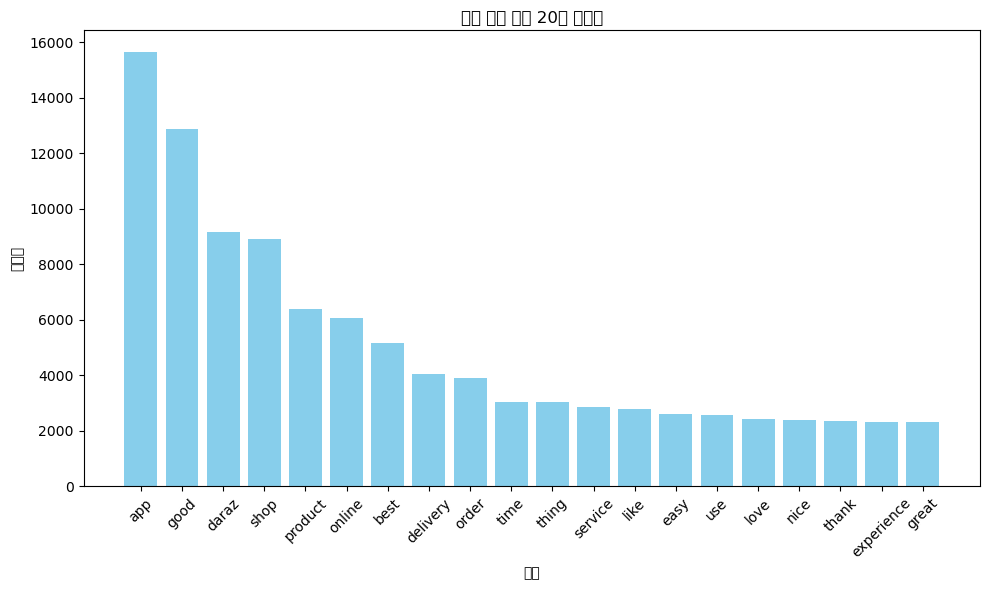

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


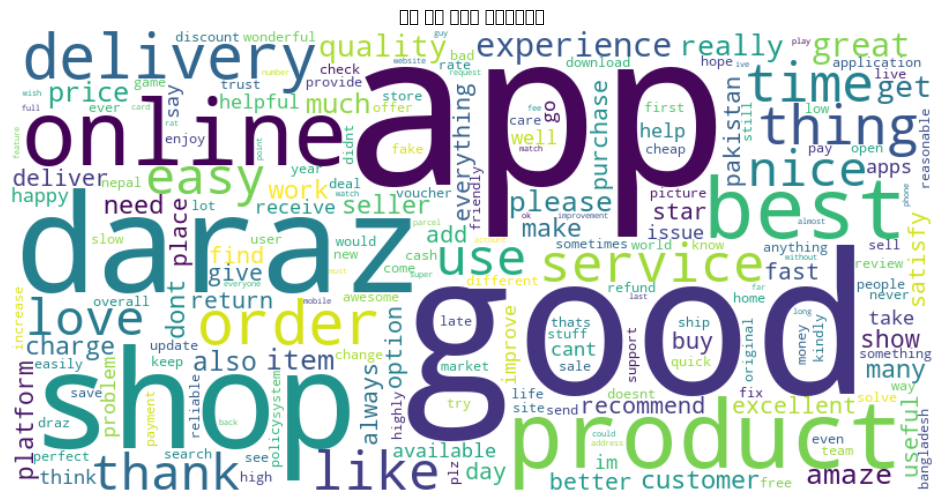

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df_sentences2 = pd.DataFrame(new_rows)

positive_review_ids = positive_reviews['original_row_number'].unique()
positive_sentences = df_sentences2[df_sentences2['original_row_number'].isin(positive_review_ids)]

positive_sentences['preprocessed_sentence'] = positive_sentences['sentence'].apply(preprocess_text)

# 피처 벡터화 진행
vectorizer = CountVectorizer()
X_positive = vectorizer.fit_transform(positive_sentences['preprocessed_sentence'])


import numpy as np

word_counts = X_positive.sum(axis=0).A1  # 1차원 배열로 변환

vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print(word_freq_df.head(20))

# 상위 20개 키워드
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('긍정 리뷰 상위 20개 키워드')
plt.tight_layout()
plt.show()

# 워드클라우드
from wordcloud import WordCloud

word_freq_dict = dict(zip(word_freq_df['word'], word_freq_df['frequency']))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('긍정 리뷰 키워드 워드클라우드')
plt.show()

In [65]:
# 상위 20개 키워드를 리스트로 추출 (이미 word_freq_df에서 정렬된 상태)
top_keywords = word_freq_df.head(20)['word'].tolist()

# 상위 키워드가 문장에 포함되어 있는지 체크하는 함수 정의
def contains_any_keyword(text, keywords):
    # 단순한 문자열 검색: 만약 소문자로 전처리된 텍스트라면 그대로 사용
    return any(keyword in text for keyword in keywords)

# 상위 키워드가 포함된 문장을 필터링
sentences_with_keywords = positive_sentences[positive_sentences['preprocessed_sentence'].apply(lambda x: contains_any_keyword(x, top_keywords))]

# 상위 키워드가 포함되지 않은 문장을 필터링하려면, 위 결과의 반대를 사용
sentences_without_keywords = positive_sentences[~positive_sentences['preprocessed_sentence'].apply(lambda x: contains_any_keyword(x, top_keywords))]

# 결과 확인
print('긍정 리뷰 필터링')
print("키워드 포함 문장 수:", len(sentences_with_keywords))
print("키워드 미포함 문장 수:", len(sentences_without_keywords))

긍정 리뷰 필터링
키워드 포함 문장 수: 42549
키워드 미포함 문장 수: 6837


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentences['preprocessed_sentence'] = negative_sentences['sentence'].apply(preprocess_text)


             word  frequency
570           app       4752
2568        daraz       3915
8561      product       3868
7694        order       3802
990           bad       3068
11005        time       2313
2856     delivery       2237
12118       worst       2008
9788      service       1947
3326         dont       1844
4551          get       1520
3886   experience       1449
4022         fake       1312
5631         item       1275
2469     customer       1225
8810      quality       1205
9993         show       1186
9288       return       1184
11549         use       1165
9941         shop       1126


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\1803149466.py:33: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
C:

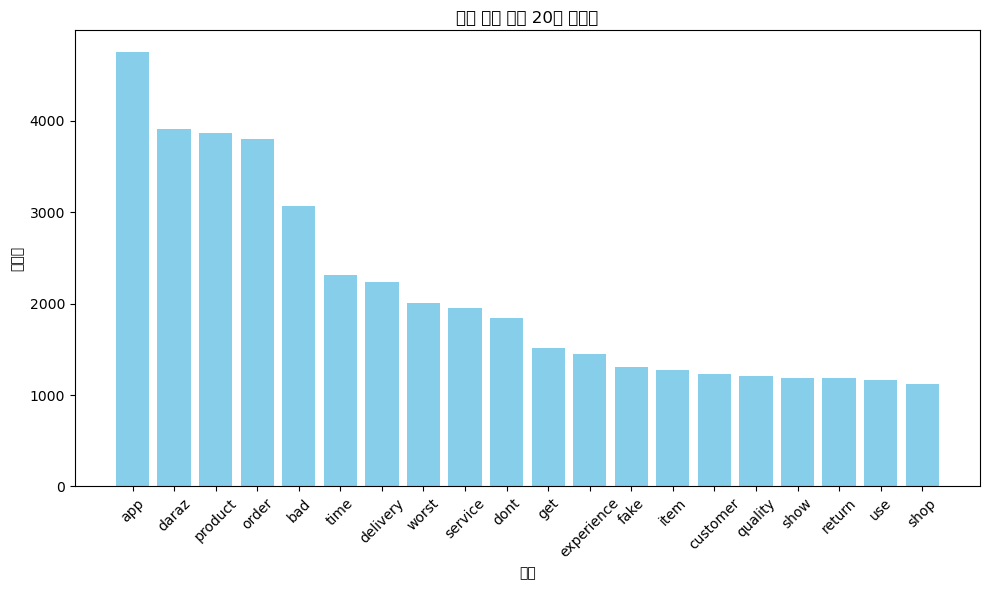

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


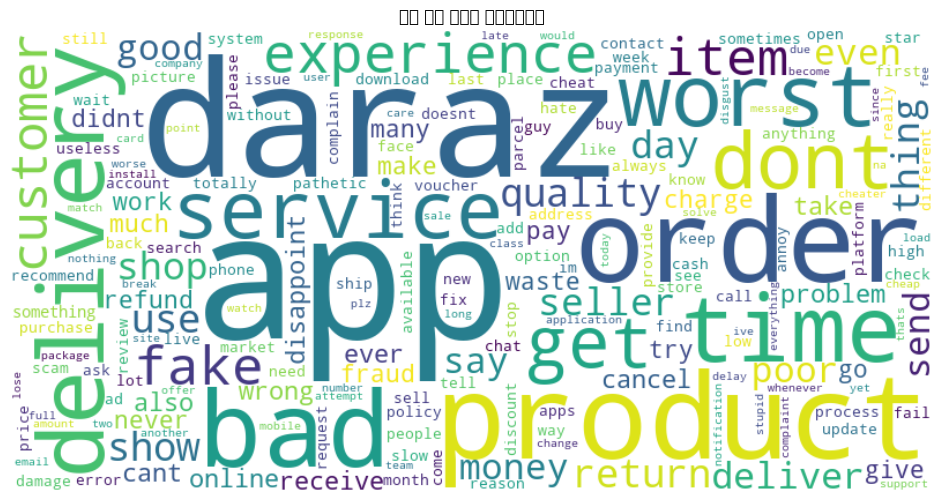

In [67]:
df_sentences2 = pd.DataFrame(new_rows)

negative_review_ids = negative_reviews['original_row_number'].unique()
negative_sentences = df_sentences2[df_sentences2['original_row_number'].isin(negative_review_ids)]

negative_sentences['preprocessed_sentence'] = negative_sentences['sentence'].apply(preprocess_text)

# 피처 벡터화 진행
vectorizer2 = CountVectorizer()
X_negative = vectorizer2.fit_transform(negative_sentences['preprocessed_sentence'])


import numpy as np

word_counts = X_negative.sum(axis=0).A1  # 1차원 배열로 변환

vocab2 = vectorizer2.get_feature_names_out()

word_freq_df2 = pd.DataFrame({'word': vocab2, 'frequency': word_counts})
word_freq_df2 = word_freq_df2.sort_values(by='frequency', ascending=False)

print(word_freq_df2.head(20))

# 상위 20개 키워드
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(word_freq_df2['word'].head(20), word_freq_df2['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('부정 리뷰 상위 20개 키워드')
plt.tight_layout()
plt.show()

# 워드클라우드
from wordcloud import WordCloud

word_freq_dict2 = dict(zip(word_freq_df2['word'], word_freq_df2['frequency']))

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict2)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('부정 리뷰 키워드 워드클라우드')
plt.show()

C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_sentences['preprocessed_sentence'] = neutral_sentences['sentence'].apply(preprocess_text)


           word  frequency
446         app       3361
2150      daraz       2774
7087    product       2762
6360      order       2411
2356   delivery       2041
9104       time       1498
3810       good       1160
3737        get       1022
4651       item       1015
8249       show       1008
2738       dont       1004
1549     charge        995
8213       shop        897
8094    service        888
9570        use        881
10011      work        806
9025      thing        773
2074   customer        751
2209        day        694
8044     seller        677


C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\812667848.py:32: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Use

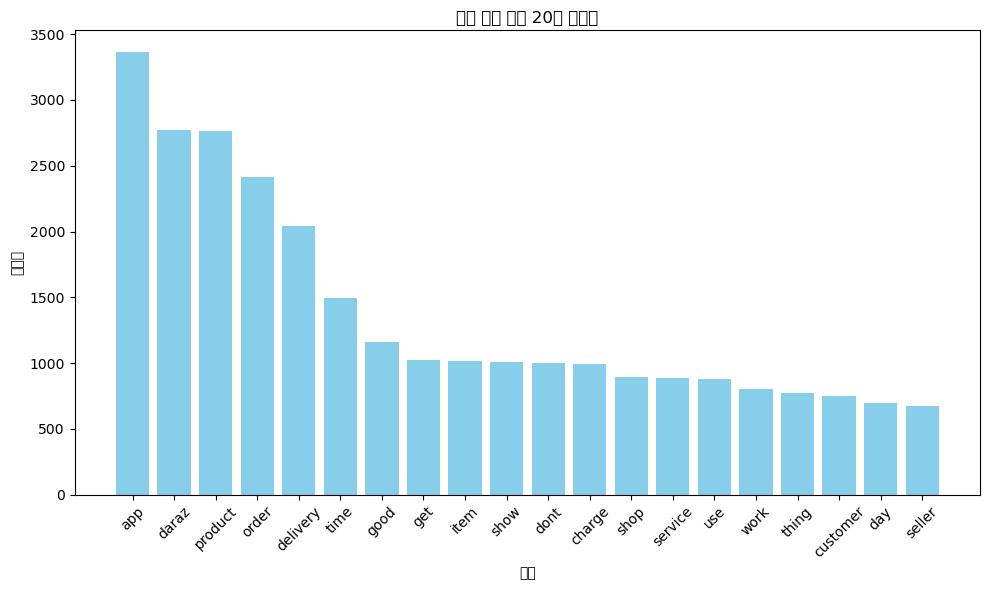

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


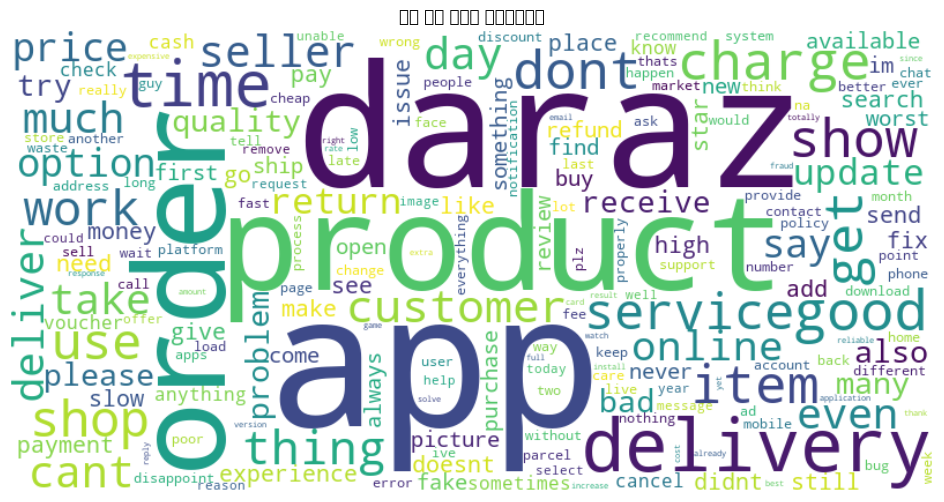

In [69]:
df_sentences2 = pd.DataFrame(new_rows)

neutral_review_ids = neutral_reviews['original_row_number'].unique()
neutral_sentences = df_sentences2[df_sentences2['original_row_number'].isin(neutral_review_ids)]

neutral_sentences['preprocessed_sentence'] = neutral_sentences['sentence'].apply(preprocess_text)

# 피처 벡터화 진행
vectorizer3 = CountVectorizer()
X_neutral = vectorizer3.fit_transform(neutral_sentences['preprocessed_sentence'])


import numpy as np

word_counts3 = X_neutral.sum(axis=0).A1  # 1차원 배열로 변환

vocab3 = vectorizer3.get_feature_names_out()

word_freq_df3 = pd.DataFrame({'word': vocab3, 'frequency': word_counts3})
word_freq_df3 = word_freq_df3.sort_values(by='frequency', ascending=False)

print(word_freq_df3.head(20))

# 상위 20개 키워드

plt.figure(figsize=(10,6))
plt.bar(word_freq_df3['word'].head(20), word_freq_df3['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('중립 리뷰 상위 20개 키워드')
plt.tight_layout()
plt.show()

# 워드클라우드
from wordcloud import WordCloud

word_freq_dict3 = dict(zip(word_freq_df3['word'], word_freq_df3['frequency']))

wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict3)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.title('부정 리뷰 키워드 워드클라우드')
plt.show()

In [ ]:
## 토픽 모델링 

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# CountVectorizer를 사용하여 텍스트를 행렬로 변환
# max_df, min_df, stop_words 등의 파라미터는 데이터 특성에 맞게 조정 가능합니다.
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_positive = vectorizer.fit_transform(positive_sentences['preprocessed_sentence'])

# LDA 모델 학습
# n_components는 토픽의 개수, 데이터에 맞춰 조정
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(X_positive)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 0: app shop online good best daraz amaze platform product pakistan
Topic 1: delivery app good charge time like fast order need work
Topic 2: product good order service quality time seller daraz customer item
Topic 3: app easy love daraz use experience great good shop thing
Topic 4: daraz thank nice app product satisfy purchase make money return


In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# CountVectorizer를 사용하여 텍스트를 행렬로 변환
vectorizer2 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_negative = vectorizer2.fit_transform(negative_sentences['preprocessed_sentence'])

# LDA 모델 학습
n_topics = 5
lda_model2 = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics2 = lda_model2.fit_transform(X_negative)

no_top_words = 10
feature_names2 = vectorizer2.get_feature_names_out()
display_topics(lda_model2, feature_names2, no_top_words)

Topic 0: order product deliver item return cancel delivery seller daraz send
Topic 1: quality money time poor product waste service order low daraz
Topic 2: app daraz dont fake use product customer work seller try
Topic 3: app worst daraz shop delivery charge online product price new
Topic 4: bad experience service app worst daraz disappoint time delivery problem


In [77]:

vectorizer3 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_neutral = vectorizer3.fit_transform(neutral_sentences['preprocessed_sentence'])

# LDA 모델 학습
n_topics = 5
lda_model3 = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics3 = lda_model3.fit_transform(X_neutral)


no_top_words = 10
feature_names3 = vectorizer3.get_feature_names_out()
display_topics(lda_model3, feature_names3, no_top_words)

Topic 0: daraz customer service return dont order money product time issue
Topic 1: app daraz good shop online use bad experience problem update
Topic 2: order product price delivery day place receive charge pay didnt
Topic 3: delivery work charge time product search item option doesnt daraz
Topic 4: product item order time delivery deliver seller send picture fake


In [ ]:
## 특이한 리뷰 확인 (감성분석은 긍정, 실제 별점은 부정 뭐 이런 것들)

In [79]:
low_score_reviews = positive_reviews[positive_reviews['score'].isin([1, 2, 3])]

low_score_ids = low_score_reviews['original_row_number'].unique()

low_score_sentences = positive_sentences[positive_sentences['original_row_number'].isin(low_score_ids)]

print("Score가 1,2,3인 리뷰의 문장 수:", len(low_score_sentences))
print(low_score_sentences.head())

Score가 1,2,3인 리뷰의 문장 수: 12154
     original_row_number                                           sentence  \
98                    16  Whoever designed the current UI/UX should be s...   
99                    16  The button to search for a new product vanishe...   
100                   16  The app was already near perfect small changes...   
106                   18  I had a great experience with my first two ord...   
107                   18                    However, I'm now facing issues.   

     score                              preprocessed_sentence  
98       1       whoever design current uiux sack immediately  
99       1  button search new product vanish block clipart...  
100      1  app already near perfect small change couldve ...  
106      3  great experience first two order daraz appparc...  
107      3                              however im face issue  


In [81]:
high_score_reviews = negative_reviews[negative_reviews['score'].isin([4,5])]

high_score_ids = high_score_reviews['original_row_number'].unique()

high_score_sentences = negative_sentences[negative_sentences['original_row_number'].isin(high_score_ids)]

print("Score가 4,5인 부정 리뷰의 문장 수:", len(high_score_sentences))
print(high_score_sentences.head())

Score가 4,5인 부정 리뷰의 문장 수: 1734
     original_row_number                                           sentence  \
500                  111                   Daraz has become very bad now 😢.   
501                  111  Searching for a product gives 1/2 the products...   
502                  111                            Delivery fee is extra🫤.   
503                  111   Can't easily talk to an agent with any problem😢.   
504                  111    It has become difficult to find good products.🥺   

     score               preprocessed_sentence  
500      4                    daraz become bad  
501      4          search product give relate  
502      4                  delivery fee extra  
503      4      cant easily talk agent problem  
504      4  become difficult find good product  


In [83]:
high_score_sentences.iloc[0:6][['original_row_number','sentence']]

,original_row_number,sentence
500,111,Daraz has become very bad now 😢.
501,111,Searching for a product gives 1/2 the products...
502,111,Delivery fee is extra🫤.
503,111,Can't easily talk to an agent with any problem😢.
504,111,It has become difficult to find good products.🥺
595,134,Why are you charging seperate delivery charge ...


                                              content  score  thumbsUpCount  \
16  whoever design current uiux sack immediately b...      1             27   
18  great experience first two order daraz appparc...      3             55   
27  yep app lot detail poorly optimize dont like l...      3              8   
29  good experience shop yesterday account log ask...      3              5   
33  great experience shop app however recently bec...      2              8   

                      appName  category  sentiment_score sentiment  
16  Daraz Online Shopping App         3         0.236616  Positive  
18  Daraz Online Shopping App         4         0.440909  Positive  
27  Daraz Online Shopping App         2         0.155556  Positive  
29  Daraz Online Shopping App         1         0.700000  Positive  
33  Daraz Online Shopping App         2         0.400000  Positive  
상위 20개 키워드:
         word  frequency
41        app       2588
374      good       2356
216     daraz       1756

C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\rud92\AppData\Local\Temp\ipykernel_34668\2292487328.py:33: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from current font.
  plt.tight_layout()
C

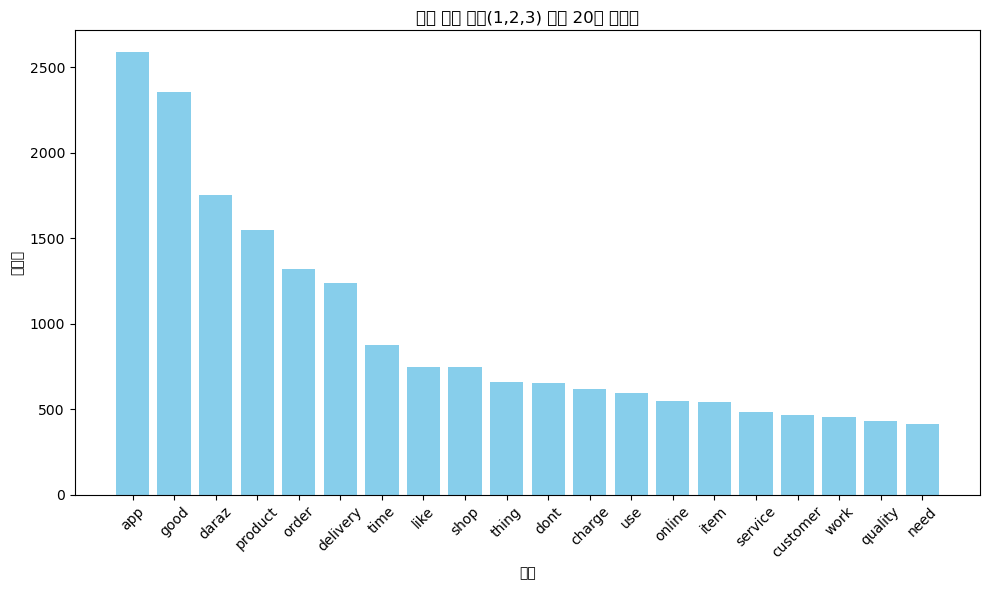

C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rud92\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


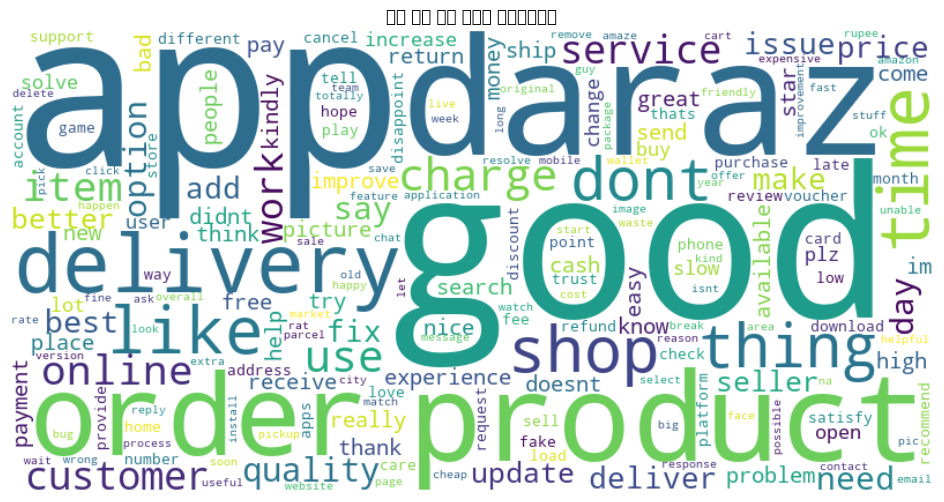

In [85]:
low_score_ids = low_score_reviews.index.unique()

low_score_contents = daraz2.loc[low_score_ids]

print(low_score_contents.head())

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

low_score_ids = low_score_reviews.index.unique()
low_score_contents = daraz2.loc[low_score_ids, 'content']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_low_score = vectorizer.fit_transform(low_score_contents)

word_counts = X_low_score.sum(axis=0).A1  # 희소 행렬을 1차원 배열로 변환
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print("상위 20개 키워드:")
print(word_freq_df.head(20))

plt.figure(figsize=(10,6))
plt.bar(word_freq_df['word'].head(20), word_freq_df['frequency'].head(20), color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.title('낮은 별점 리뷰(1,2,3) 상위 20개 키워드')
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white')\
    .generate_from_frequencies(dict(zip(word_freq_df['word'], word_freq_df['frequency'])))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('낮은 별점 리뷰 키워드 워드클라우드')
plt.show()

In [121]:
low_score_reviews.head

<bound method NDFrame.head of        original_row_number  avg_sentiment_score  score  negative_ratio  \
16                      16             0.190633      1        0.000000   
18                      18             0.271400      3        0.200000   
27                      27             0.168471      3        0.285714   
29                      29             0.467150      3        0.000000   
33                      33             0.155600      2        0.000000   
...                    ...                  ...    ...             ...   
53926                53926             0.659700      2        0.000000   
53948                53948             0.361200      3        0.000000   
53971                53971             0.794700      2        0.000000   
53990                53990             0.421500      3        0.000000   
53993                53993             0.599400      1        0.000000   

       neutral_ratio  positive_ratio sentiment_label  
16          0.666667      

In [87]:
## 긍정 감정, 낮은 별점 토픽모델링 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

low_score_ids = low_score_reviews.index.unique()
low_score_contents = daraz2.loc[low_score_ids, 'content']

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_low_score = vectorizer.fit_transform(low_score_contents)

n_topics = 5  # 토픽 개수 (필요에 따라 조정)
lda_model = LatentDirichletAllocation(n_components=n_topics, 
                                      max_iter=10, 
                                      learning_method='online',
                                      random_state=42)
lda_topics = lda_model.fit_transform(X_low_score)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, no_top_words)

Topic 0: app work fix update daraz good use new like issue
Topic 1: order daraz customer app nice dont help say service place
Topic 2: good app shop online daraz product order best thing quality
Topic 3: good delivery product app charge daraz price like time order
Topic 4: option delivery cash payment add available satisfy pay product sell


긍정 감정인데 별점이 낮은 것들 ---> 왜 그럴까? 어떤 요소가 부정적인 영향을 미쳤을까

이걸 위해 할 수 있는 것
1) 긍정 감정인데 별점이 낮은 리뷰들의 긍정/부정/중립 문장의 비율을 봐야지. 이건 이미 확인한 사안임
--> 이걸 시각화하는 방법!!

2) 그 중에서 부정 문장들만을 뽑아서, 거기에서 공통적으로 나타나는 키워드가 있는지 확인하면 좋겠다.
--> daraz, app 과 같은 표현은 제외하도록 설정할 수 있을까? 

3) 토픽 모델링을 해도 좋을 거야!! 

=============================================================================================

부정 감정인데 별점이 높은 것들 --> 왜 그럴까? 어떤 요소가 긍정적인 영향을 미쳣을까

1)부정 감정인데 별점이 높은 리뷰들의 문장 구성 비율을 볼 것
2) 그 중에서 긍정, 중립 문장을 뽑아서 거기서 공통적으로 나타나는 키워 확인 & 토픽 모델링 진행 


#### 토픽 모델링 & 키워드 분석

- 긍정 리뷰 : Pakistan..?  / delivery / charge / fast / order / work / need / service / quality / seller / item / money

- 중립 리뷰 : online / update / charge / delivery / seller / picture / fake 

- 부정 리뷰 : deliver / return / cancel / delivery / seller / send / quality / money / time / poor / waste / service / low / fake / worst / online / price / new

  --> 공통적으로 나타나는 delivery 문제 / quality 문제 / seller 문제 이 부분을 일단 집중해서 파악
  --> 부정리뷰, 중립리뷰 모두에서 나타난 fake 문제를 확인하기

  그 외에도 update, cancel, return 와 같은 단어가 들어간 리뷰들도 확인하기.


## 긍정 감정인데, 낮은 별점 --> 해당 리뷰의 negative 문장들

In [101]:
low_score_reviews[['negative_ratio', 'neutral_ratio', 'positive_ratio']]

,negative_ratio,neutral_ratio,positive_ratio
16,0.000000,0.666667,0.333333
18,0.200000,0.400000,0.400000
27,0.285714,0.142857,0.571429
29,0.000000,0.000000,1.000000
33,0.000000,0.600000,0.400000
...,...,...,...
53926,0.000000,0.000000,1.000000
53948,0.000000,0.000000,1.000000
53971,0.000000,0.000000,1.000000
53990,0.000000,0.000000,1.000000


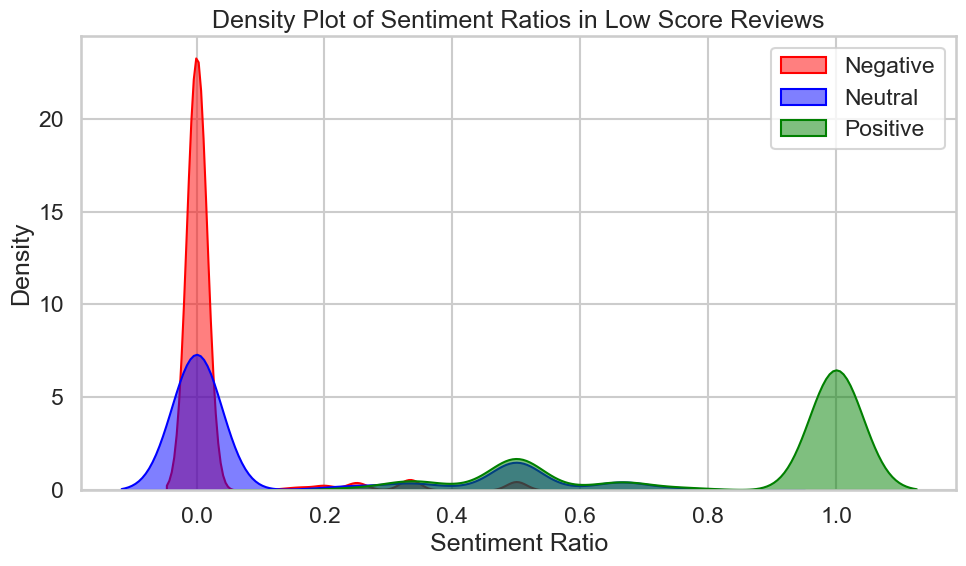

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정 (R의 density plot 느낌을 위해 깔끔한 스타일)
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

# 각 감성 비율의 density plot을 그립니다.
sns.kdeplot(low_score_reviews['negative_ratio'], 
            fill=True, 
            color='red', 
            alpha=0.5, 
            label='Negative')

sns.kdeplot(low_score_reviews['neutral_ratio'], 
            fill=True, 
            color='blue', 
            alpha=0.5, 
            label='Neutral')

sns.kdeplot(low_score_reviews['positive_ratio'], 
            fill=True, 
            color='green', 
            alpha=0.5, 
            label='Positive')

plt.xlabel('Sentiment Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Ratios in Low Score Reviews')
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
low_score_reviews2 = low_score_reviews.reset_index()

In [130]:
low_score_reviews2.head

<bound method NDFrame.head of       index  original_row_number  avg_sentiment_score  score  negative_ratio  \
0        16                   16             0.190633      1        0.000000   
1        18                   18             0.271400      3        0.200000   
2        27                   27             0.168471      3        0.285714   
3        29                   29             0.467150      3        0.000000   
4        33                   33             0.155600      2        0.000000   
...     ...                  ...                  ...    ...             ...   
6822  53926                53926             0.659700      2        0.000000   
6823  53948                53948             0.361200      3        0.000000   
6824  53971                53971             0.794700      2        0.000000   
6825  53990                53990             0.421500      3        0.000000   
6826  53993                53993             0.599400      1        0.000000   

      neu

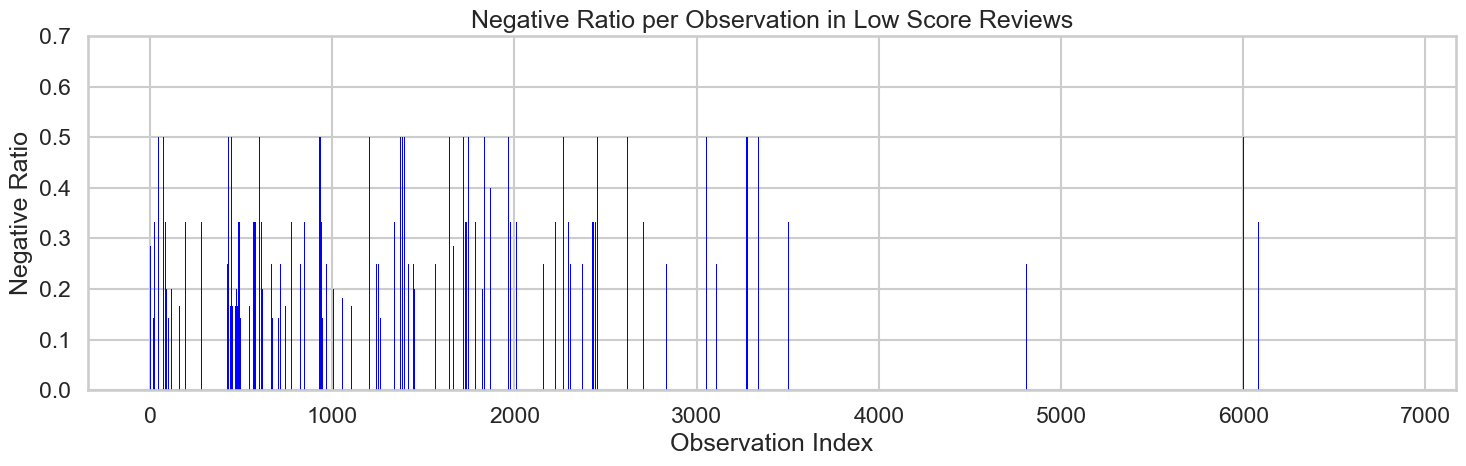

In [134]:
import matplotlib.pyplot as plt

#긍정 감정인데 low 별점인 경우
plt.figure(figsize=(15, 5))
plt.bar(low_score_reviews2.index, low_score_reviews2['negative_ratio'], width=1.0, color='blue', edgecolor='none')
plt.xlabel('Observation Index')
plt.ylabel('Negative Ratio')
plt.title('Negative Ratio per Observation in Low Score Reviews')
plt.tight_layout()
plt.show()

긍정 감정인데 low 별점인 경우는 굉장히 신기하게 부정적인 문장의 비율이 0.5를 넘지 않는 것이 대부분

--> 그렇다면 자연스럽게 해당 문장들의 요소가 사용자가 낮은 별점을 주게 된 이유였다는 것. 

---> 특히 부정 감정의 비율이 0.3 이하인 것들은 더 특별해 보임 --> 해당 내용들은 따로 확인할 필요가 있다고 판단됨. 

In [149]:
low_score_sentences.head()

,original_row_number,sentence,score,preprocessed_sentence
98,16,Whoever designed the current UI/UX should be s...,1,whoever design current uiux sack immediately
99,16,The button to search for a new product vanishe...,1,button search new product vanish block clipart...
100,16,The app was already near perfect small changes...,1,app already near perfect small change couldve ...
106,18,I had a great experience with my first two ord...,3,great experience first two order daraz appparc...
107,18,"However, I'm now facing issues.",3,however im face issue


In [151]:
low_score_reviews.head()

,original_row_number,avg_sentiment_score,score,negative_ratio,neutral_ratio,positive_ratio,sentiment_label
16,16,0.190633,1,0.000000,0.666667,0.333333,Positive
18,18,0.271400,3,0.200000,0.400000,0.400000,Positive
27,27,0.168471,3,0.285714,0.142857,0.571429,Positive
29,29,0.467150,3,0.000000,0.000000,1.000000,Positive
33,33,0.155600,2,0.000000,0.600000,0.400000,Positive


In [163]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

##low_score_sentences = low_score_sentences.merge(
##    df_sentences[['original_row_number', 'sentiment_label']], 
##    on='original_row_number', 
##    how='left'
##)


selected_ids = low_score_reviews[low_score_reviews['negative_ratio'] <= 0.3]['original_row_number'].unique()

selected_sentences = low_score_sentences[low_score_sentences['original_row_number'].isin(selected_ids)]
negative_sentences = selected_sentences[selected_sentences['sentiment_label'] == 'Negative']

print("선택된 Negative 문장 수:", len(negative_sentences))

# 키워드 분석
custom_stop_words = ['daraz', 'app']
vectorizer = CountVectorizer(stop_words=custom_stop_words)
X_negative = vectorizer.fit_transform(negative_sentences['preprocessed_sentence'])

word_counts = X_negative.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': vocab, 'frequency': word_counts})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

print("키워드 분석 상위 20개:")
print(word_freq_df.head(20))

# 토픽 모델링 (LDA) 진행
n_topics = 5  
lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_topics = lda_model.fit_transform(X_negative)

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()

print("\nLDA 토픽 모델링 결과:")
display_topics(lda_model, feature_names, no_top_words)

선택된 Negative 문장 수: 61206
키워드 분석 상위 20개:
          word  frequency
1141   product       6852
625        get       4361
1035     order       4151
637       good       4060
380   delivery       4022
336   customer       3746
1099    please       3373
1291       say       3103
439       dont       2789
1335      shop       2672
1023    online       2600
234     charge       2527
1564       use       2507
1310    seller       2406
1494     thing       2229
860       like       2208
1257    return       2080
790      issue       1971
1070       pay       1813
792       item       1756

LDA 토픽 모델링 결과:
Topic 0: customer, say, return, thing, issue, good, item, product, support, order
Topic 1: charge, pay, delivery, increase, product, least, still, order, shop, online
Topic 2: good, shop, online, please, use, need, fix, also, update, money
Topic 3: product, seller, order, delivery, get, please, keep, look, dont, even
Topic 4: product, get, please, sale, love, service, post, help, office, im


1. topic0
   - customer, return, suppor : 반품이나 지원 관련 이슈들이 나옴. 고객 서비스나 반품 처리 과정에서의 문제점일 가능성 높음
  
2. topic1
    - delibery, online, increase, charge : 온라인 주문(배송비 추가)과 쇼핑 시 가격 부담이나 추가 비용에 대한 불만이 있는 것으로 보임.

3. topic2
    - 좋은 점과 개선이 필요한 점들을 함께 언급하고 있는 것으로 보임
      
4. topic3
    - seller, delibery, order : 판매자나 배송 서비스에 대해 불만족 하는 경우


대략 이 정도로 보임
--> 반품 관련(return) / 온라인 주문 + 배송 문제(online, delivery, charge) / 가격 인상(increase) / 판매자 관련 (seller)
이 단어들을 포함한 단어들을 확인

In [170]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  # 긴 문자열 전체 출력

keywords = ["return", "support", "delivery", "online", "charge", "increase", "seller"]

pattern = "|".join(keywords)

filtered_reviews = daraz2[daraz2['content'].str.contains(pattern, case=False, na=False)]


print("필터링된 리뷰 예시:")
print(filtered_reviews['content'].head(10))

필터링된 리뷰 예시:
0                                                                                                                                                                          app bombard ad make feel cheap fraudulent website really lose class charge cash delivery tap frustrate want useless prop customer service whole
3                                                                                                                                                   much ad notification option disable device system set app include delivery chat message store annoy hell daraz fix dont offer something ill open know deal ever minute
6                                                                       overload ad daraz instal try suppose discount order app sham amount notification get turn personal phone machine mention poor service deliver feel like sometimes u pay never refund either followup call several hour wisdom always cash delivery
8     ive great experience use daraz shop a

### 위의 결과 해석
1. 과도한 광고와 알림
2. 배송과 반품 과정에서 시간지연, 환불 실패 등의 문제가 발생
3. 업데이트 했는데 기능 저하, 사용성 저하
4. 가격 상승 및 할인 혜택 줄어듦
5. 제품 품질, 판매자 신뢰도 하락

--> ad / delivery, return / update / increase / seller, quality 단어 중심으로 클러스터링 진행하면 좋을 것 같음 

### 부정 감정인데 별점이 높은 것들 --> 왜 그럴까? 어떤 요소가 긍정적인 영향을 미쳣을까

1)부정 감정인데 별점이 높은 리뷰들의 문장 구성 비율을 볼 것 2) 그 중에서 긍정, 중립 문장을 뽑아서 거기서 공통적으로 나타나는 키워 확인 & 토픽 모델링 진행

In [173]:
high_score_sentences

,original_row_number,sentence,score,preprocessed_sentence
500,111,Daraz has become very bad now 😢.,4,daraz become bad
501,111,Searching for a product gives 1/2 the products related to that search🙁.,4,search product give relate
502,111,Delivery fee is extra🫤.,4,delivery fee extra
503,111,Can't easily talk to an agent with any problem😢.,4,cant easily talk agent problem
504,111,It has become difficult to find good products.🥺,4,become difficult find good product
...,...,...,...,...
95994,53388,"Lagging, delayed services",4,lag delay service
96033,53422,Its nice but everything is a scam 😕 😒 😪 😔,4,nice everything scam
96038,53426,Some time good and some time bad,4,time good bad
96332,53685,Low price all product,5,low price product


In [184]:
high_score_reviews

,original_row_number,avg_sentiment_score,score,negative_ratio,neutral_ratio,positive_ratio,sentiment_label
111,111,-0.203320,4,0.40,0.40,0.2,Negative
134,134,-0.213520,4,0.40,0.60,0.0,Negative
167,167,-0.193750,5,0.50,0.50,0.0,Negative
224,224,-0.168950,4,0.50,0.00,0.5,Negative
238,238,-0.398225,4,0.75,0.25,0.0,Negative
...,...,...,...,...,...,...,...
53388,53388,-0.571900,4,1.00,0.00,0.0,Negative
53422,53422,-0.226300,4,1.00,0.00,0.0,Negative
53426,53426,-0.153100,4,1.00,0.00,0.0,Negative
53685,53685,-0.273200,5,1.00,0.00,0.0,Negative


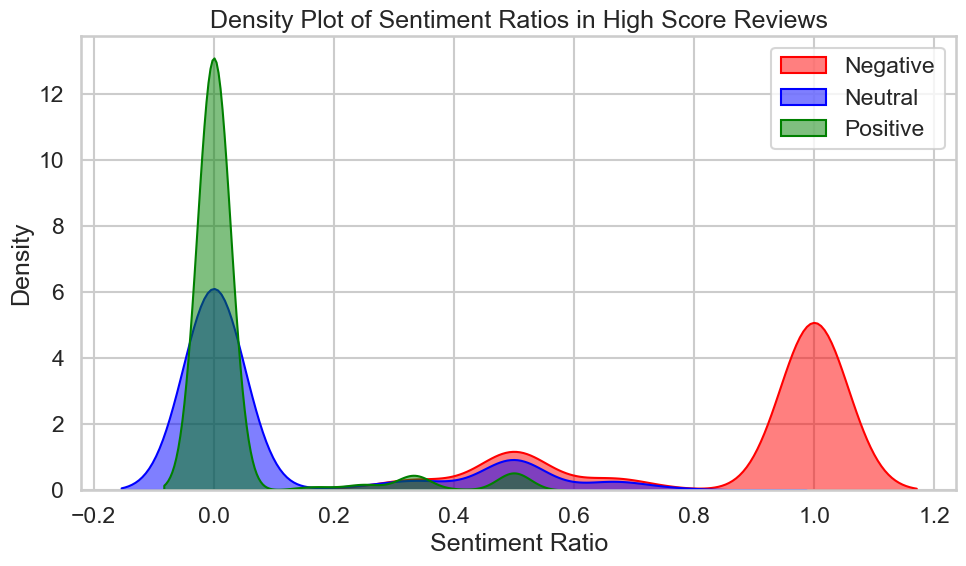

In [186]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

sns.kdeplot(high_score_reviews['negative_ratio'], 
            fill=True, 
            color='red', 
            alpha=0.5, 
            label='Negative')

sns.kdeplot(high_score_reviews['neutral_ratio'], 
            fill=True, 
            color='blue', 
            alpha=0.5, 
            label='Neutral')

sns.kdeplot(high_score_reviews['positive_ratio'], 
            fill=True, 
            color='green', 
            alpha=0.5, 
            label='Positive')

plt.xlabel('Sentiment Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Ratios in High Score Reviews')
plt.legend()
plt.tight_layout()
plt.show()


In [188]:
high_score_reviews2 = high_score_reviews.reset_index()
high_score_reviews2.head


<bound method NDFrame.head of       index  original_row_number  avg_sentiment_score  score  negative_ratio  \
0       111                  111            -0.203320      4            0.40   
1       134                  134            -0.213520      4            0.40   
2       167                  167            -0.193750      5            0.50   
3       224                  224            -0.168950      4            0.50   
4       238                  238            -0.398225      4            0.75   
...     ...                  ...                  ...    ...             ...   
1099  53388                53388            -0.571900      4            1.00   
1100  53422                53422            -0.226300      4            1.00   
1101  53426                53426            -0.153100      4            1.00   
1102  53685                53685            -0.273200      5            1.00   
1103  53924                53924            -0.128000      5            1.00   

      neu

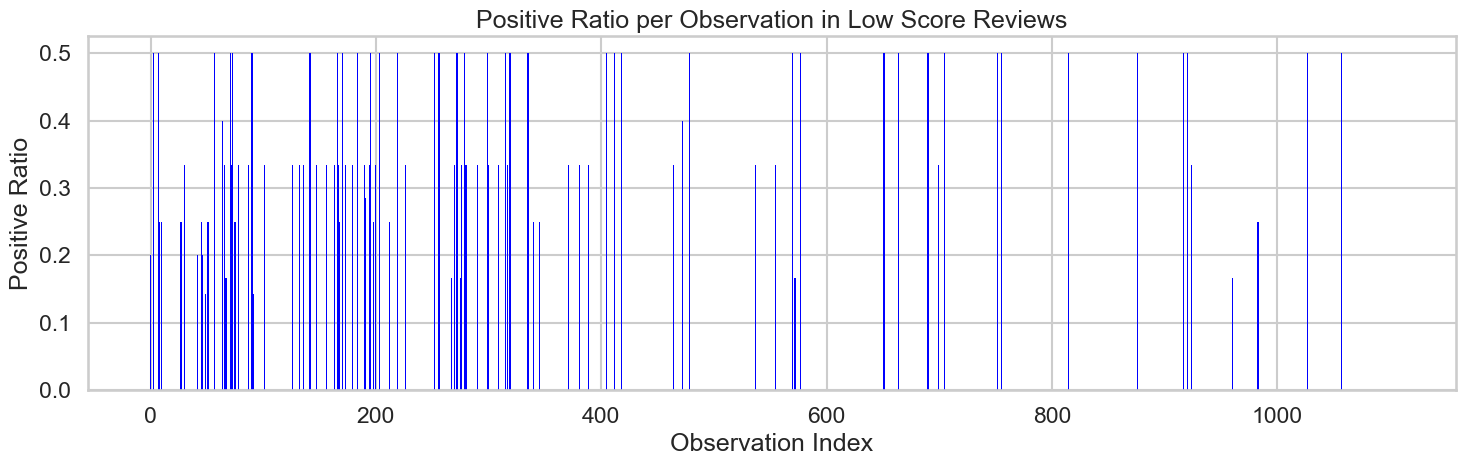

In [190]:
import matplotlib.pyplot as plt

#부정 감정인데 High 별점인 경우
plt.figure(figsize=(15, 5))
plt.bar(high_score_reviews2.index, high_score_reviews2['positive_ratio'], width=1.0, color='blue', edgecolor='none')
plt.xlabel('Observation Index')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio per Observation in Low Score Reviews')
plt.tight_layout()
plt.show()

In [192]:
high_score_sentences.head()
high_score_reviews.head()

,original_row_number,avg_sentiment_score,score,negative_ratio,neutral_ratio,positive_ratio,sentiment_label
111,111,-0.203320,4,0.40,0.40,0.2,Negative
134,134,-0.213520,4,0.40,0.60,0.0,Negative
167,167,-0.193750,5,0.50,0.50,0.0,Negative
224,224,-0.168950,4,0.50,0.00,0.5,Negative
238,238,-0.398225,4,0.75,0.25,0.0,Negative


## 부정 감정인데, 높은 별점 --> 해당 리뷰의 negative 문장들

In [194]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

high_score_sentences = high_score_sentences.merge(
    df_sentences[['original_row_number', 'sentiment_label']], 
    on='original_row_number', 
    how='left'
)


selected_ids2 = high_score_reviews[high_score_reviews['positive_ratio'] <= 0.3]['original_row_number'].unique()

selected_sentences2 = high_score_sentences[high_score_sentences['original_row_number'].isin(selected_ids2)]
negative_sentences2 = selected_sentences2[selected_sentences2['sentiment_label'] == 'Negative']

print("선택된 Negative 문장 수:", len(negative_sentences2))

# 키워드 분석
custom_stop_words = ['daraz', 'app']
vectorizer2 = CountVectorizer(stop_words=custom_stop_words)
X_negative2 = vectorizer2.fit_transform(negative_sentences2['preprocessed_sentence'])

word_counts2 = X_negative2.sum(axis=0).A1
vocab2 = vectorizer2.get_feature_names_out()

word_freq_df2 = pd.DataFrame({'word': vocab2, 'frequency': word_counts2})
word_freq_df2 = word_freq_df2.sort_values(by='frequency', ascending=False)

print("키워드 분석 상위 20개:")
print(word_freq_df2.head(20))

# 토픽 모델링 (LDA) 진행
n_topics = 5  
lda_model2 = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_topics2 = lda_model2.fit_transform(X_negative2)

no_top_words = 10
feature_names2 = vectorizer2.get_feature_names_out()

print("\nLDA 토픽 모델링 결과:")
display_topics(lda_model2, feature_names2, no_top_words)


선택된 Negative 문장 수: 2178
키워드 분석 상위 20개:
           word  frequency
1601    product        368
1425      order        330
195         bad        281
874        good        236
545    delivery        208
1830     seller        188
2086       time        179
1590    problem        178
758        fake        141
2062      thing        136
1093       item        129
864         get        129
1865       shop        125
1846    service        114
1411     online         98
2183        use         96
2306      wrong         94
1928  sometimes         93
627        dont         91
1645    quality         88

LDA 토픽 모델링 결과:
Topic 0: good, product, thing, quality, service, bad, sometimes, delivery, time, seller
Topic 1: product, bad, experience, wrong, item, send, delivery, order, fake, use
Topic 2: bad, product, good, shop, order, seller, fake, online, time, dont
Topic 3: problem, order, show, delivery, fix, option, say, disappoint, error, place
Topic 4: order, cancel, delivery, customer, call, 

## 부정 감정인데, 높은 별점 --> 해당 리뷰의 positive 문장들

In [198]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

selected_ids2 = high_score_reviews[high_score_reviews['positive_ratio'] <= 0.3]['original_row_number'].unique()

selected_sentences2 = high_score_sentences[high_score_sentences['original_row_number'].isin(selected_ids2)]
positive_sentences3 = selected_sentences2[selected_sentences2['sentiment_label'] == 'Positive']

print("선택된 Positive 문장 수:", len(positive_sentences3))

# 키워드 분석
custom_stop_words = ['daraz', 'app']
vectorizer3 = CountVectorizer(stop_words=custom_stop_words)
X_positive3 = vectorizer3.fit_transform(positive_sentences3['preprocessed_sentence'])

word_counts3 = X_positive3.sum(axis=0).A1
vocab3 = vectorizer3.get_feature_names_out()

word_freq_df3 = pd.DataFrame({'word': vocab3, 'frequency': word_counts3})
word_freq_df3 = word_freq_df3.sort_values(by='frequency', ascending=False)

print("키워드 분석 상위 20개:")
print(word_freq_df3.head(20))

# 토픽 모델링 (LDA) 진행
n_topics = 5  
lda_model3 = LatentDirichletAllocation(n_components=n_topics, max_iter=10, random_state=42)
lda_topics3 = lda_model3.fit_transform(X_positive3)

no_top_words = 10
feature_names3 = vectorizer3.get_feature_names_out()

print("\nLDA 토픽 모델링 결과:")
display_topics(lda_model3, feature_names3, no_top_words)

선택된 Positive 문장 수: 133
키워드 분석 상위 20개:
           word  frequency
267      return         12
202       order         12
236     product         11
25          bad         10
49     complain          8
275        send          8
248      really          8
274      seller          8
282        shop          7
121         get          7
24         back          7
64     customer          7
278     service          7
101  experience          7
269         say          6
75     delivery          6
37         cant          6
330         use          6
249     receive          5
192       never          5

LDA 토픽 모델링 결과:
Topic 0: send, seller, dress, order, complain, problem, parcel, email, wrong, bad
Topic 1: get, complain, seller, product, difficult, need, soon, worst, fix, service
Topic 2: return, bad, experience, really, lose, shop, money, service, back, star
Topic 3: product, order, delivery, say, return, take, issue, still, cant, item
Topic 4: use, chat, help, customer, also, love, time,

#### 별점이 높은 리뷰에서 추출한 부정 문장

##### 키워드 분석 결과
1. 상위 빈도 단어로 product, order, bad, delivery, seller, problem, fake
2. 전반적으로 주문 처리, 배송, 제품의 fake 여부나 품질, 판매자나 고객 서비스와 관련된 문제들이 부정 문장에서 자주 언급


##### 토픽 모델링 결과

1. Topic 0:  제품의 질과 서비스에 대해 긍정적 요소(good, quality, service)와 동시에 부정적 문제(bad, delivery, time, seller)가 혼재됨 
2. Topic 1:  주문 및 배송 과정에서 발생하는 문제 / 잘못된 제품 배송이나 제품의 진품 여부에 대한 의심(wrong, fake)
3. Topic 2:  온라인 쇼핑과 관련해 주문 및 판매자에 대한 불신 / 전반적으로 부정적 평가(bad, dont)
4. Topic 3: 주문 처리 및 배송 과정에서의 문제 / 오류나 고객의 실망(disappoint, error)에 초점
5. Topic 4:  주문 취소 및 반품 / 고객 서비스와 관련된 불만

   
#### 전체적인 시사점

별점이 높은 리뷰임에도 불구하고, 부정 문장에서는 주문, 배송, 제품 진위, 고객 서비스 등 구체적인 문제들이 반복적으로 언급됨.
전반적으로는 만족스러운 경험을 했다고 평가하면서도, 특정 과정(배송 지연, 잘못된 제품 수령, 반품/환불 처리 등)에서 불만을 가지고 있음
이런 불일치는 긍정적 요소(제품 다양성, 앱의 사용 편의성 등)와 부정적 요소(구체적인 문제 상황)가 함께 존재함으로써 발생

#### 별점이 높은 리뷰에서 추출한 긍정 문장 

1. 키워드 분석 결과

주요 단어:
retur order product bad complain send seller delivery : 주문 처리, 제품 상태, 반품 및 배송 과정, 그리고 판매자나 고객 서비스에 문제가 있음

긍정 단어와 부정 단어의 혼재:
complain bad return 부정적인 단어들이 높은 빈도로 등장 -->  customer service experience 단어 등장
전반적으로는 높은 별점을 주면서도, 특정 프로세스나 서비스 단계에서 문제를 경험함을 보여줌

2. 토픽 모델링 
    1) Topic 0: send, seller, dress, order, complain, problem, parcel, email, wrong, bad
       - 배송 과정과 관련된 문제(잘못된 주문, 불만, 문제 발생), 판매자와 관련한 이슈 보임.
       - "dress"라는 단어는 특정 제품(의류 등)를 의미하거나, 전반적으로 주문/배송 과정에서 발생하는 오류 관련 토픽일 수 있음. 


    2) Topic 1: get, complain, seller, product, difficult, need, soon, worst, fix, service
       - 제품을 받는 과정에서의 어려움, 판매자와 서비스에 대한 불만

    3) Topic 2: return, bad, experience, really, lose, shop, money, service, back, star
       - 반품(return) 및 구매 경험에 대한 불만. 제품 구매 후 환불이나 재구매 과정에서의 문제, 그리고 돈 문제 등이 언급

    5)  Topic 3: product, order, delivery, say, return, take, issue, still, cant, item
        - 제품 주문 및 배송과 관련된 이슈.

    5) Topic 4: use, chat, help, customer, also, love, time, provide, due, recently
       - 이 토픽은 비교적 긍정적인 요소 & 사용 및 고객 지원 측면의 문제가 언급

3. 결론
모순된 고객 경험:
별점이 높은 리뷰에서도 고객들은 주문, 배송, 반품, 판매자 및 고객 지원과 관련된 여러 문제점을 경험.

혼재된 피드백:
리뷰 내에 긍정적인 평가와 부정적인 불만이 동시에 나타난다는 것은 고객들이 여러 요소를 종합해 높은 점수를 주었으나 세부적으로는 개선이 필요한 부분이 있음을 의미함

실제 개선 필요 영역:
배송 과정, 반품 및 환불 프로세스, 판매자 및 고객 지원 문제 등이 개선 대상임을 알 수 있으며, 이러한 문제들이 고객 만족도에 어느 정도 영향을 미치고 있을 가능성 큼


### 결론 

1. 배송 및 반품, 환불 과정에서의 문제점   "delivery" / "return" / "return"
2. 판매자 진위 여부, 제품의 퀄리티와 관련한 문제점   "fake" / "seller" / "quality"
3. 고객서비스 관련 문제    "service"

   - 이 정도를 공통적인 문제점으로 꼽을 수 있을 것으로 보임. 이 단어들을 중심으로 클러스터링 하면 좋을 듯! 